In [50]:
import pandas as pd


In [75]:
table = pd.read_excel(    #reaed excel function reads following file
    io='RNA_molecules_data.xltm', #opens file of table
    sheet_name='Sheet1',
    usecols=[
        'Gene Names',    #these are the column names used by sheet
        'Protein copy number average [molecules/cell]',
        'mRNA copy number average [molecules/cell]'
    ]
).rename(columns={    #then you rename column names as desired
    'Gene Names': 'Gene Name',
    'Protein copy number average [molecules/cell]': 'Protein Copy',
    'mRNA copy number average [molecules/cell]': 'mRNA Copy'
})
#this makes the table
table

,Gene Name,Protein Copy,mRNA Copy
0,Hist1h2af;Hist3h2a;Hist1h2ab;Hist1h2ac;Hist1h2...,1.121956e+08,NaN
1,Hist1h4a;Hist1h4b;H4-53;Hist1h4c;H4-12;Hist1h4...,1.142768e+08,NaN
2,Actb,1.201244e+08,2187.76
3,Hist2h2bb,8.423518e+07,NaN
4,Hist1h3b;H3-53;H3.2;H3b;Hist1h3c;H3-143;Hist1h...,5.986543e+07,NaN
...,...,...,...
5023,Atr;Kiaa4069,6.137000e+01,2.59
5024,Ubr3;Kiaa2024;Zfp650;Znf650,2.653200e+02,11.87
5025,Itpr1;Insp3r;Pcd6;Pcp1,2.126900e+02,5.36
5026,Dmd;RP23-58B9.1-001,1.145000e+02,NaN


In [74]:
transcript_length = pd.read_csv(
    "summer_gene_expression/data/from_tstoeger/200609_transcript_lengths/mouse.csv")
merged = pd.merge(  #will merge the following:
    left=table,
    right=transcript_length.rename(columns={
        'gene_ncbi': 'Gene ID',
        'symbol_ncbi': 'Gene Name',
        'transcript_length': 'Transcript Length'
    })
)
#this merges with transcript length
merged

,Gene Name,Protein Copy,mRNA Copy,Gene ID,Transcript Length
0,Actb,1.201244e+08,2187.76,11461,1935.0
1,Hist2h2bb,8.423518e+07,NaN,319189,493.0
2,Cfl1,2.072841e+07,729.82,12631,1196.0
3,Tubb5,2.801025e+07,395.89,22154,2645.0
4,Rpl18,1.441415e+07,408.90,19899,708.0
...,...,...,...,...,...
1216,Pcdhgc3,2.785500e+02,29.05,93706,4687.0
1217,Ptpn14,2.967900e+02,NaN,19250,10766.0
1218,Kif7,1.725500e+02,2.82,16576,4523.5
1219,Kif13a,1.206500e+02,5.07,16553,6866.0


In [64]:
#this is a table for correlation
corr = merged.corr(method="spearman")
corr

,Protein Copy,mRNA Copy,Gene ID,Transcript Length
Protein Copy,1.000000,0.574122,-0.162045,-0.364041
mRNA Copy,0.574122,1.000000,-0.222308,-0.281542
Gene ID,-0.162045,-0.222308,1.000000,0.115053
Transcript Length,-0.364041,-0.281542,0.115053,1.000000


In [ ]:
'create scatter plot for correlation: set log scale for transcript length;'
%matplotlib inline
import matplotlib.pyplot as plt

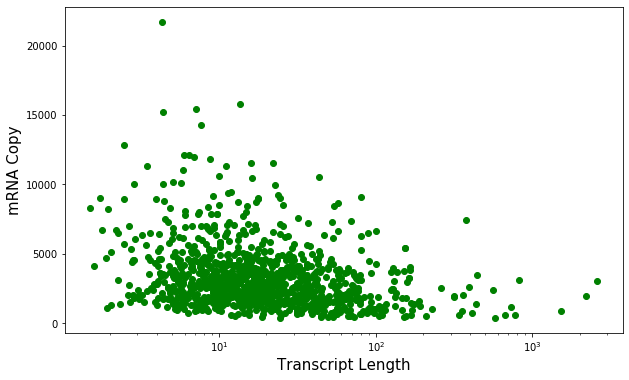

In [73]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(merged["mRNA Copy"], merged["Transcript Length"], color='Green')
#Labels
ax.set_xlabel('Transcript Length', fontsize = 15)
ax.set_ylabel('mRNA Copy', fontsize = 15)
ax.set_xscale('log')
##

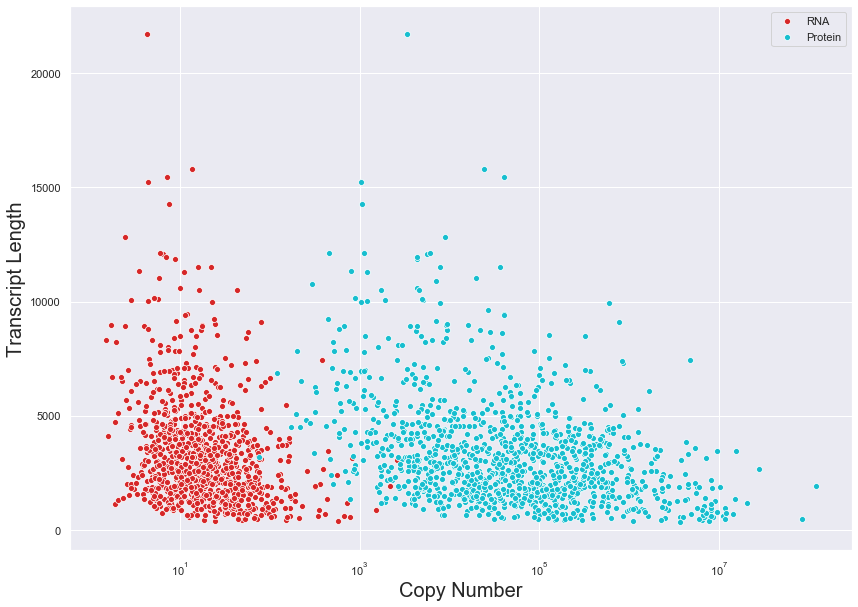

In [145]:
# seaborn plot
import seaborn as sns; sns.set()

fig = plt.figure(figsize = (14, 10))

ax = sns.scatterplot(x='mRNA Copy', y='Transcript Length', data=merged, color = 'tab:red', label = "RNA")
ax = sns.scatterplot(x='Protein Copy', y='Transcript Length', data=merged, color = 'tab:cyan', label = "Protein")

ax.set_xlabel('Copy Number', fontsize = 20)
ax.set_ylabel('Transcript Length', fontsize = 20)
ax.set_xscale('log')

In [51]:
# wb = xlrd.open_workbook('RNA_molecules_data.xltm') #this opens the file im reading
# sheet = wb.sheet_by_index(0)            #this "sheet_by_index" command extracts the nth sheet in the workbook. 
# #in this case, there was only 1 sheet inside the workbook so i put "0" to extract the first sheet in workbook
# table = pd.DataFrame({"Protein ID": sheet.col_values(0, 1),#DataFrame is formatted this way with column:rows
#                       "Protein Name": sheet.col_values(1, 1),
#                       "Protein Copy": sheet.col_values(13, 1),
#                       "mRNA Copy": sheet.col_values(16, 1),
#                       "Gene Name": [i.split(";")[0].upper() for i in sheet.col_values(2,1)]},
#                     index = [i for i in range(0, sheet.nrows-1)])

# table = table.replace("NA", np.nan)

In [61]:
# transcript_length = pd.read_csv("summer_gene_expression/data/from_tstoeger/200609_transcript_lengths/human.csv")
# transcript_length.columns = ["Gene ID", "Gene Name", "Transcript Length"]
# merged = pd.merge(table, transcript_length, on="Gene Name", how="inner")
# merged